# 🎬 Movie Recommendation & Prediction System

## Comprehensive Machine Learning Project

**Authors**: Marcel YAMMINE / Thomas WARTELL  
**Dataset**: The Movies Dataset (TMDb)

---

### Table of Contents

1. **Project Overview & Data Loading**
   - Dataset description
   - Initial data loading

2. **Descriptive Analysis**
   - Movies metadata exploration
   - Credits data analysis
   - Ratings analysis
   - Visualizations and insights

3. **Data Preprocessing**
   - Data cleaning
   - Feature engineering
   - Text processing

4. **Problem Formalization & Modeling**
   - Content-based filtering
   - Collaborative filtering
   - Machine learning models
   - Model evaluation

5. **Results & Recommendations**

---


In [34]:
import pandas as pd

In [35]:
credits_data = pd.read_csv("credits.csv",encoding="utf-8", engine="python",on_bad_lines="skip")
keywords_data = pd.read_csv("keywords.csv")
links_data = pd.read_csv("links.csv")
links_small_data = pd.read_csv("links_small.csv")
movies_metadata_data = pd.read_csv("movies_metadata.csv")
ratings_data = pd.read_csv("ratings.csv")
ratings_small_data = pd.read_csv("ratings_small.csv")

C:\Users\pwart\AppData\Local\Temp\ipykernel_26808\3522639094.py:5: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [36]:
print("credits data head")
print(credits_data.head())
print("keywords data head")
print(keywords_data.head())
print("links data head")
print(links_data.head())
print("links small data head")
print(links_small_data.head())
print("movies metadata head")
print(movies_metadata_data.head())
print("ratings data head")
print(ratings_data.head())
print("ratings small data head")
print(ratings_small_data.head())

credits data head
                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  
keywords data head
      id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'i

# 1. Descriptive analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

movies = pd.read_csv(
    "movies_metadata.csv",
    low_memory=False
)

print(f"Shape: {movies.shape}")
movies.info()


Shape: (45466, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-nu

In [38]:
# a quick preview
display(movies.head(3))

# the summary of numeric columns
display(movies.describe())

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


The dataset contains metadata 45,466 movies.
Columns include both numerical (budget, popularity, vote_average) and textual/categorical (title, genres, overview, release_date) variables.
Some columns have missing or mixed data types (strings, numbers, lists).
The dataset is quite large and diverse, so we’ll focus on the most relevant features for content-based recommendations.

In [39]:
for col in ["budget", "revenue", "popularity"]:
    movies[col] = pd.to_numeric(movies[col], errors='coerce')

numeric_cols = ["budget", "revenue", "vote_average", "vote_count", "popularity", "runtime"]
corr = movies[numeric_cols].corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="Viridis",
    title="Correlation Heatmap between Movie Features"
)
fig.show()



This heatmap shows how the main numerical features in our dataset are related to each other.
We can clearly see that budget and revenue have a strong positive correlation — which makes sense, since bigger production budgets usually lead to higher box office results.
There’s also a noticeable link between vote_count and popularity, meaning that the more people rate a movie, the more popular it tends to be.
On the other hand, vote_average (the rating itself) doesn’t really depend on the budget or revenue, which shows that high production costs don’t always mean better reviews.
Finally, runtime has almost no correlation with any other variable, suggesting that movie length doesn’t really affect its success or audience reception.

In [40]:
# we cleaned numeric columns and handle missing values
movies["budget"] = pd.to_numeric(movies["budget"], errors="coerce")
movies["revenue"] = pd.to_numeric(movies["revenue"], errors="coerce")
movies["popularity"] = pd.to_numeric(movies["popularity"], errors="coerce")

# we dropped rows where budget or revenue are missing or zero
movies_clean = movies.dropna(subset=["budget", "revenue", "popularity"])
movies_clean = movies_clean[(movies_clean["budget"] > 0) & (movies_clean["revenue"] > 0)]

# we decided to scale down large budgets and revenues to have a better visualization so here we took 1000 samples to keep the visualization readable
movies_clean = movies_clean.sample(1000, random_state=42)

fig = px.scatter(
    movies_clean,
    x="budget", y="revenue",
    color="vote_average",
    hover_data=["title", "release_date"],
    title="Budget vs. Revenue (Colored by Vote Average)",
    size="popularity",
    log_x=True, log_y=True
)

fig.show()



This graph shows the relationship between a movie’s budget and its revenue.
We can clearly see that movies with higher budgets usually make more money, which makes sense since they tend to get more marketing and wider releases.
However, the color scale (showing the average rating) proves that spending more doesn’t always mean making a better movie — some expensive films still receive low ratings.
Overall, this confirms that while money helps drive success at the box office, audience appreciation depends on more than just the budget.

In [41]:
movies_pop = movies.dropna(subset=["popularity", "vote_average", "original_language"])
movies_pop = movies_pop[movies_pop["popularity"] > 0]
movies_pop = movies_pop[movies_pop["vote_average"] > 0]

# the same as before we took 1500 samples
movies_pop = movies_pop.sample(1500, random_state=42)

fig = px.scatter(
    movies_pop,
    x="popularity", y="vote_average",
    color="original_language",
    hover_data=["title", "genres"],
    title="Popularity vs Vote Average (by Language)",
    color_discrete_sequence=px.colors.qualitative.Set2,
    log_x=True
)
fig.show()


C:\Anaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



This chart compares how popular a movie is with its average rating, separated by language.
We can see that popularity and vote average don’t always move together — some films are very popular but not necessarily highly rated, while others are well-rated but less known.
Most of the points cluster around moderate popularity values, especially for English movies, which dominate the dataset.
This shows that being popular doesn’t always mean being better rated — popularity often reflects visibility more than quality.

In [42]:
movies_run = movies.dropna(subset=["runtime"])
movies_run = movies_run[(movies_run["runtime"] > 0) & (movies_run["runtime"] <= 300) ]

fig = px.histogram(
    movies_run,
    x="runtime",
    nbins=50,
    color_discrete_sequence=["#636EFA"],
    title="Distribution of Movie Runtimes"
)
fig.update_layout(
    xaxis_title="Runtime (minutes)",
    yaxis_title="Number of movies"
)
fig.show()


This histogram shows how long most movies last.
The majority of films fall between 90 and 120 minutes, which matches the typical length of commercial movies.
There are a few shorter or longer films, but they are much less common.
This tells us that most productions follow a standard duration, probably because it’s what audiences and cinemas prefer.

In [43]:
credits = pd.read_csv("credits.csv", encoding="utf-8", engine="python", on_bad_lines="skip")
keywords = pd.read_csv("keywords.csv")
print(credits.shape, keywords.shape)

print(credits.head(3))
print(keywords.head(3))

(45476, 3) (46419, 2)
                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
      id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...


In [44]:
import ast

def to_obj(x):
    if isinstance(x, list): return x
    try: return ast.literal_eval(x)
    except: return []

credits['cast'] = credits['cast'].apply(to_obj)
credits['crew'] = credits['crew'].apply(to_obj)
keywords['keywords'] = keywords['keywords'].apply(to_obj)

print("Missing cast %:", (credits['cast'].apply(len)==0).mean()*100)
print("Missing crew %:", (credits['crew'].apply(len)==0).mean()*100)
print("Missing keywords %:", (keywords['keywords'].apply(len)==0).mean()*100)


Missing cast %: 5.3170903333626525
Missing crew %: 1.6953997713079427
Missing keywords %: 31.872724530903294


In [45]:
movies['id']   = pd.to_numeric(movies['id'], errors='coerce')
credits['id']  = pd.to_numeric(credits['id'], errors='coerce')
keywords['id'] = pd.to_numeric(keywords['id'], errors='coerce')
display(movies[['id','original_title' if 'original_title' in movies.columns else 'title']].head(2))
display(credits[['id','cast','crew']].head(2))
display(keywords[['id','keywords']].head(2))

,id,original_title
0,862.0,Toy Story
1,8844.0,Jumanji


,id,cast,crew
0,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [46]:
df = (movies.merge(credits[['id','cast','crew']], on='id', how='left')
      .merge(keywords[['id','keywords']], on='id', how='left'))

print(df.shape)
df[['id','original_title','cast','crew','keywords']].head(3)


(46632, 27)


,id,original_title,cast,crew,keywords
0,862.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844.0,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602.0,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


We will now look at the ratings datasets, first, we will study the small with fewer data and then apply the same methods over the bigger dataset. We will calculate the 0.25 and the 0.75 quantiles and the mean to have an idea of a minimum rating to get for our suggesting algorithm per user in the future.

Ratings statistics :
Mean : 3.54
Quantiles :
0.25    3.0
0.75    4.0
Name: rating, dtype: float64


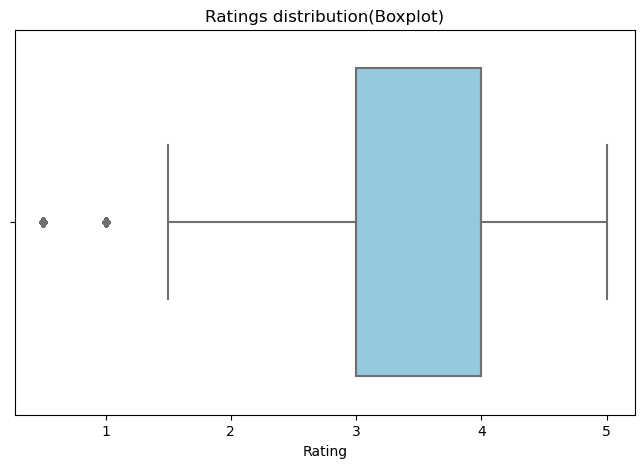

In [47]:
ratings_small = pd.read_csv("ratings_small.csv")


mean_rating = ratings_small['rating'].mean()
quantiles = ratings_small['rating'].quantile([0.25, 0.75])

print("Ratings statistics :")
print(f"Mean : {mean_rating:.2f}")
print("Quantiles :")
print(quantiles)

plt.figure(figsize=(8, 5))
sns.boxplot(x=ratings_small['rating'], color='skyblue')
plt.title("Ratings distribution(Boxplot)")
plt.xlabel("Rating")
plt.show()

rating_counts = ratings_small['rating'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=rating_counts.index,
    y=rating_counts.values,
    marker_color='lightblue',
    name='Number of ratings'
))
fig.add_vline(x=mean_rating, line_dash="dash", line_color="red", 
              annotation_text="Mean", annotation_position="top left")

for q, val in quantiles.items():
    fig.add_vline(x=val, line_dash="dot", line_color="green", 
                  annotation_text=f"Q{int(q*100)}", annotation_position="top left")

fig.update_layout(
    title="Ratings distribution with mean and quantiles",
    xaxis_title="Rating",
    yaxis_title="Number of movies rated",
    template="plotly_white"
)

fig.show()

We look now into the ratings into the ratings_small csv with less datas to have a first idea of the data. We we will calculate the mean and the quantiles. The first quantile is at 3 rating and the upper quantile is at 4 with the mean around 3.5 rating. From the first trend sorting out, our model can try predict at least 3 for an user to recommend him movies. Now, next step is to globalize by regarding if the rating csv show the same trend.

Ratings statistics:
Mean : 3.54
Quantiles :
0.25    3.0
0.75    4.0
Name: rating, dtype: float64


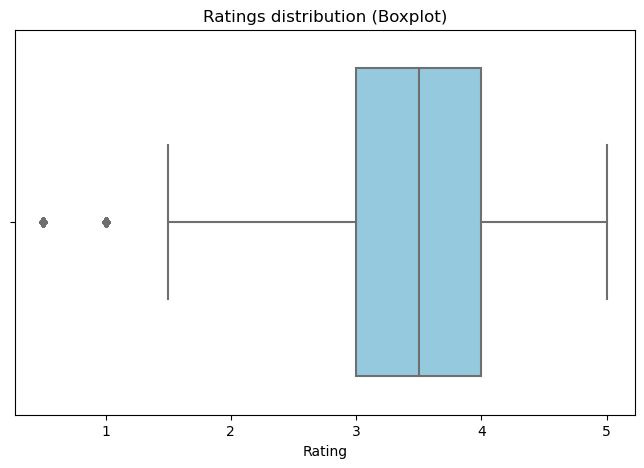

In [48]:
ratings = pd.read_csv("ratings.csv")


mean_rating = ratings['rating'].mean()
quantiles = ratings['rating'].quantile([0.25, 0.75])

print("Ratings statistics:")
print(f"Mean : {mean_rating:.2f}")
print("Quantiles :")
print(quantiles)

plt.figure(figsize=(8, 5))
sns.boxplot(x=ratings['rating'], color='skyblue')
plt.title("Ratings distribution (Boxplot)")
plt.xlabel("Rating")
plt.show()

rating_counts = ratings['rating'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=rating_counts.index,
    y=rating_counts.values,
    marker_color='lightblue',
    name='Number of ratings'
))
fig.add_vline(x=mean_rating, line_dash="dash", line_color="red", 
              annotation_text="Mean", annotation_position="top left")

for q, val in quantiles.items():
    fig.add_vline(x=val, line_dash="dot", line_color="green", 
                  annotation_text=f"Q{int(q*100)}", annotation_position="top left")

fig.update_layout(
    title="Ratings distribution with mean and quantiles",
    xaxis_title="Rating",
    yaxis_title="Number of rated movies",
    template="plotly_white"
)

fig.show()

The trends appearing in the smaller dataset are confirming in the bigger dataset. It seems however that the repartition is the same, it's just the amount differing, so using ratings_small dataset instead of this one can first be interesting to handle lower amount of data and training. Switching to the bigger dataset could be interesting for model deployment 

# 2. Preprocessing

To prepare the data before feeding it into the model, we start by cleaning and harmonizing all sources. Missing columns are filled with default values, and movie release dates are converted to years to simplify analysis. The genres and keywords of the films, which are often stored as text or complex character strings, are transformed into structured lists so that the model can easily use them. The texts of the synopses or descriptions are tokenized, i.e., converted into sequences of numbers representing each word, and then these sequences are made the same length so that the neural network can process them.

The numerical characteristics of the films, such as popularity, budget, or duration, are normalized so that their values are on the same scale and do not disproportionately influence the model. Finally, the film data is merged with user ratings to obtain a complete table where each row represents a film associated with a user, with all its information prepared for training. This preprocessing step is essential for the model to learn correctly and produce reliable predictions.

**movies_metadata**

In [49]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1889 to 7225
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  1000 non-null   object 
 1   belongs_to_collection  235 non-null    object 
 2   budget                 1000 non-null   float64
 3   genres                 1000 non-null   object 
 4   homepage               336 non-null    object 
 5   id                     1000 non-null   object 
 6   imdb_id                1000 non-null   object 
 7   original_language      1000 non-null   object 
 8   original_title         1000 non-null   object 
 9   overview               998 non-null    object 
 10  popularity             1000 non-null   float64
 11  poster_path            1000 non-null   object 
 12  production_companies   1000 non-null   object 
 13  production_countries   1000 non-null   object 
 14  release_date           1000 non-null   object 
 15  revenu

In [50]:
# we copied the dataset to avoid touching the original
movies_clean = movies.copy()

# we dropped columns that are clearly unnecessary
movies_clean = movies_clean.drop(columns=[
    'homepage',          # website URL (not useful for analysis)
    'poster_path',       # image path
    'video',             # always false
    'adult',             # mostly false / irrelevant
    'imdb_id'            # redundant with TMDb id
], errors='ignore')

# convert numeric columns
numeric_cols = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']
for col in numeric_cols:
    movies_clean[col] = pd.to_numeric(movies_clean[col], errors='coerce')

# convert release_date to datetime
movies_clean['release_date'] = pd.to_datetime(movies_clean['release_date'], errors='coerce')

# drop duplicates and reset index
movies_clean = movies_clean.drop_duplicates(subset=['title']).reset_index(drop=True)

print("Cleaned dataset shape:", movies_clean.shape)
print("Remaining columns:", movies_clean.columns.tolist())



Cleaned dataset shape: (42278, 19)
Remaining columns: ['belongs_to_collection', 'budget', 'genres', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


This light cleaning makes the dataset easier to explore and visualize without losing important information.

In [51]:
# we dropped rows with no title or overview because we can't guess them
movies_clean = movies_clean.dropna(subset=['title', 'overview'])

# fill missing numeric values with reasonable defaults depending on each one
movies_clean['runtime'] = movies_clean['runtime'].fillna(movies_clean['runtime'].median())
movies_clean['vote_average'] = movies_clean['vote_average'].fillna(movies_clean['vote_average'].mean())
movies_clean['vote_count'] = movies_clean['vote_count'].fillna(0)
movies_clean['popularity'] = movies_clean['popularity'].fillna(movies_clean['popularity'].median())

# replace missing release years with 0 just to keep the format consistent
movies_clean['release_date'] = pd.to_datetime(movies_clean['release_date'], errors='coerce')
movies_clean['release_year'] = movies_clean['release_date'].dt.year
movies_clean['release_year'] = movies_clean['release_year'].fillna(0).astype(int)

# fill empty categorical columns with "Unknown"
for col in ['original_language', 'status']:
    movies_clean[col] = movies_clean[col].fillna('Unknown')

# replace 0 or missing budget/revenue with median
movies_clean['budget'] = movies_clean['budget'].replace(0, np.nan)
movies_clean['revenue'] = movies_clean['revenue'].replace(0, np.nan)
movies_clean['budget'] = movies_clean['budget'].fillna(movies_clean['budget'].median())
movies_clean['revenue'] = movies_clean['revenue'].fillna(movies_clean['revenue'].median())

# a last check
movies_clean.isnull().sum().sort_values(ascending=False).head(10)


belongs_to_collection    37061
tagline                  22318
release_date                68
id                           0
runtime                      0
vote_count                   0
vote_average                 0
title                        0
genres                       0
status                       0
dtype: int64

In this step, we filled or removed missing values to make the dataset more consistent.
For example, we dropped movies without a title or overview (since they can’t be used for recommendations),
and replaced missing runtimes, ratings, or popularity values with the median or mean to avoid bias.
We also made sure that text columns like original_language and status don’t stay empty.
This keeps the dataset clean and ready for visual analysis or model building.

**keywords and credits**

In [52]:
import ast
def safe_list(x):
    if isinstance(x, list):
        return x
    try:
        return ast.literal_eval(x)
    except:
        return []

df['keywords'] = df['keywords'].apply(safe_list)
df['keywords_list'] = df['keywords'].apply(lambda lst: [d['name'] for d in lst if isinstance(d, dict) and 'name' in d])
df['keywords_list'] = df['keywords_list'].apply(lambda lst: [kw.lower().replace(" ", "_") for kw in lst])
df['keywords_str'] = df['keywords_list'].apply(lambda lst: " ".join(lst))
df[['original_title','keywords_list','keywords_str']].head(5)

,original_title,keywords_list,keywords_str
0,Toy Story,"[jealousy, toy, boy, friendship, friends, riva...",jealousy toy boy friendship friends rivalry bo...
1,Jumanji,"[board_game, disappearance, based_on_children'...",board_game disappearance based_on_children's_b...
2,Grumpier Old Men,"[fishing, best_friend, duringcreditsstinger, o...",fishing best_friend duringcreditsstinger old_men
3,Waiting to Exhale,"[based_on_novel, interracial_relationship, sin...",based_on_novel interracial_relationship single...
4,Father of the Bride Part II,"[baby, midlife_crisis, confidence, aging, daug...",baby midlife_crisis confidence aging daughter ...


In [53]:
import ast

def to_obj(x):
    if isinstance(x, list):
        return x
    try:
        return ast.literal_eval(x)
    except:
        return []

df['cast'] = df['cast'].apply(to_obj)

def get_top3_cast(cast_list):
    cast_list = [c for c in cast_list if isinstance(c, dict) and 'name' in c]
    cast_list = sorted(cast_list, key=lambda x: x.get('order', 9999))
    top3 = cast_list[:3]
    return [actor['name'] for actor in top3]

df['cast_list'] = df['cast'].apply(get_top3_cast)
df['cast_list'] = df['cast_list'].apply(lambda lst: [name.lower().replace(" ", "_") for name in lst])
df['cast_str'] = df['cast_list'].apply(lambda lst: " ".join(lst))
df[['original_title','cast_list','cast_str']].head(5)


,original_title,cast_list,cast_str
0,Toy Story,"[tom_hanks, tim_allen, don_rickles]",tom_hanks tim_allen don_rickles
1,Jumanji,"[robin_williams, jonathan_hyde, kirsten_dunst]",robin_williams jonathan_hyde kirsten_dunst
2,Grumpier Old Men,"[walter_matthau, jack_lemmon, ann-margret]",walter_matthau jack_lemmon ann-margret
3,Waiting to Exhale,"[whitney_houston, angela_bassett, loretta_devine]",whitney_houston angela_bassett loretta_devine
4,Father of the Bride Part II,"[steve_martin, diane_keaton, martin_short]",steve_martin diane_keaton martin_short


In [54]:
import ast
def to_obj(x):
    if isinstance(x, list):
        return x
    try:
        return ast.literal_eval(x)
    except:
        return []

df['crew'] = df['crew'].apply(to_obj)

def get_director(crew_list):
    for d in crew_list:
        if isinstance(d, dict) and d.get('job') == 'Director' and d.get('name'):
            return d['name']
    return ""

df['director_name'] = df['crew'].apply(get_director)
df['director_name'] = df['director_name'].apply(lambda s: s.lower().replace(" ", "_") if s else "")
df['director_str'] = df['director_name']
df[['original_title','director_name','director_str']].head(5)


,original_title,director_name,director_str
0,Toy Story,john_lasseter,john_lasseter
1,Jumanji,joe_johnston,joe_johnston
2,Grumpier Old Men,howard_deutch,howard_deutch
3,Waiting to Exhale,forest_whitaker,forest_whitaker
4,Father of the Bride Part II,charles_shyer,charles_shyer


In [55]:
df['combined_features'] = (
    df['keywords_str'] + " " +
    df['cast_str'] + " " +
    df['director_str']).str.strip()
df[['original_title','combined_features']].head(10)


,original_title,combined_features
0,Toy Story,jealousy toy boy friendship friends rivalry bo...
1,Jumanji,board_game disappearance based_on_children's_b...
2,Grumpier Old Men,fishing best_friend duringcreditsstinger old_m...
3,Waiting to Exhale,based_on_novel interracial_relationship single...
4,Father of the Bride Part II,baby midlife_crisis confidence aging daughter ...
5,Heat,robbery detective bank obsession chase shootin...
6,Sabrina,paris brother_brother_relationship chauffeur l...
7,Tom and Huck,jonathan_taylor_thomas brad_renfro rachael_lei...
8,Sudden Death,terrorist hostage explosive vice_president jea...
9,GoldenEye,cuba falsely_accused secret_identity computer_...


# 3. Formalisation of the problem.

The objective of this project is to build a content-based movie recommendation system. Instead of predicting ratings or classifications, the system aims to recommend movies that are similar in content to a given one. The similarity is determined by analysing features such as movie genres, keywords, cast, crew, and textual descriptions like the overview or tagline.
In machine learning terms, this is an unsupervised learning problem because there is no target variable to predict. The system learns to measure similarity between movies by transforming textual and categorical information into numerical feature vectors using techniques such as count vectorization, or one-hot encoding. The relationships between movies are then quantified through similarity metrics, which captures how close two feature vectors are in a high-dimensional space.
The overall goal is to identify and recommend the top-N most similar movies for any given title. The outcome will be a model capable of suggesting films that share thematic, stylistic, or narrative similarities, thereby improving the user experience on streaming platforms through personalised recommendations.


In [25]:
# baseline Content-Based Model using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# we use the cleaned dataset
df = movies_clean.copy()

# we kept the movies with an overview
df = df.dropna(subset=['overview'])

# TF-IDF transformation
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

df = df.reset_index()

# Define a simple recommendation function
def recommend(title, n=5):
    if title not in df['title'].values:
        return f"Movie '{title}' not found in dataset."

    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]  # skip itself
    movie_indices = [i[0] for i in sim_scores]

    return df[['title', 'vote_average', 'popularity', 'release_year']].iloc[movie_indices]

# Test the recommender
recommend("The Dark Knight")


,title,vote_average,popularity,release_year
40375,III,5.7,0.541651,2015
2013,House,5.8,13.208902,1986
23713,Borrowed Time,5.4,1.122720,2013
2087,The Farmer's Wife,10.0,0.211754,2012
21344,The Monkey's Paw,4.2,3.062433,2013


In this part, we built a simple recommendation model based only on the movie descriptions (the "overview" column).
We used a technique called TF-IDF, which transforms text into numbers based on how important each word is. Then, we calculated how similar movies are using cosine similarity — a mathematical way to see how close two descriptions are.
Finally, we created a small function called recommend() that shows the most similar movies to the one we choose.

In [26]:
print("Recommendations for 'The Dark Knight':")
display(recommend("The Dark Knight"))

print("\nRecommendations for 'Titanic':")
display(recommend("Titanic"))

print("\nRecommendations for 'Deadpool':")
display(recommend("Deadpool"))

print("\nRecommendations for 'Moulin Rouge':")
display(recommend("Moulin Rouge!"))



Recommendations for 'The Dark Knight':


,title,vote_average,popularity,release_year
17362,The Dark Knight Rises,7.6,20.582580,2012
1311,Batman Returns,6.6,15.001681,1992
14858,Batman: Under the Red Hood,7.6,7.039325,2010
20039,Batman Unmasked: The Psychology of the Dark Kn...,8.0,1.084614,2008
149,Batman Forever,5.2,13.321354,1995



Recommendations for 'Titanic':


,title,vote_average,popularity,release_year
3231,Raise the Titanic,5.2,2.132843,1980
18895,Ghost Voyage,5.4,0.900107,2008
35402,Dustbin Baby,8.0,1.253951,2008
2534,The Legend of 1900,8.1,7.668214,1998
2388,Beyond the Poseidon Adventure,5.3,3.276763,1979



Recommendations for 'Deadpool':


,title,vote_average,popularity,release_year
11401,Day Watch,6.2,7.429080,2006
11419,Mr. Brooks,6.8,7.423812,2007
33533,Please Kill Mr. Know It All,5.5,0.095686,2013
32896,Felt,5.0,0.643327,2014
34125,Alter Ego,4.5,0.075118,2007



Recommendations for 'Moulin Rouge':


,title,vote_average,popularity,release_year
25052,Girl in Gold Boots,2.2,0.481618,1968
4669,Dancing at the Blue Iguana,5.3,1.900076,2000
20332,Act of Love,8.0,1.169288,1953
13520,The Cell 2,3.4,7.790201,2009
37870,The Good Sister,4.0,0.511356,2014


The results look quite good for a first model.
For example, when we test it with The Dark Knight, the system suggests other Batman-related or superhero movies like The Dark Knight Rises or Batman Returns — which makes total sense.
Same thing for Titanic: it recommends movies about the sea, ships, or tragic journeys (Raise the Titanic, Ghost Voyage...).
It means the model already captures the semantic meaning of the movie plots, even without using genres or keywords.
Of course, it’s still a basic version — later we could improve it by combining more features like genres, keywords, or even the director’s name.

#### This is just a first test of our baseline model to make sure the recommendation system works properly before adding more features.

In [56]:
db = movies_clean.copy()
db = db.drop(columns=['belongs_to_collection', 'tagline'])
db.isnull().sum()

budget                   0
genres                   0
id                       0
original_language        0
original_title           0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date            68
revenue                  0
runtime                  0
spoken_languages         0
status                   0
title                    0
vote_average             0
vote_count               0
release_year             0
dtype: int64

In [57]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

def prepare_surprise_data(ratings, sample_users=None):
    df = ratings.copy()
    
    if sample_users is not None:
        df = df[df['userId'].isin(sample_users)]
    
    # Surprise requires an explicite rating scale
    reader = Reader(rating_scale=(df['rating'].min(), df['rating'].max()))
    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
    return data

def train_surprise_model(data):
    param_grid = {
        'n_factors': [20, 50],
        'n_epochs': [10, 20],
        'lr_all': [0.002, 0.005],
        'reg_all': [0.02, 0.05]
    }
    gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
    gs.fit(data)
    
    print("Best RMSE score:", gs.best_score['rmse'])
    print("Best params:", gs.best_params['rmse'])
    
    best_model = gs.best_estimator['rmse']
    
    # Split train/test
    trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
    best_model.fit(trainset)
    
    # Predictions
    predictions = best_model.test(testset)
    rmse = accuracy.rmse(predictions, verbose=False)
    
    # Approximative R²
    y_true = np.array([pred.r_ui for pred in predictions])
    y_pred = np.array([pred.est for pred in predictions])
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    
    print(f"Final evaluation -> RMSE: {rmse:.4f}, approximative R²: {r2:.4f}")
    
    return best_model, trainset


def show_user_recommendations_verbose(user_id, model, trainset, db, ratings, top_k=10):
    """
    Display recommendations for the user with complete info
    """
    all_items = db['id'].unique()
    
    # Movies already watched by the user
    seen = set([j for (j, _) in trainset.ur[trainset.to_inner_uid(user_id)]]) \
        if user_id in trainset._raw2inner_id_users else set()
    
    predictions = []
    for iid in all_items:
        try:
            inner_iid = trainset.to_inner_iid(iid)
            if inner_iid in seen:
                continue
            pred = model.predict(user_id, iid)
            predictions.append({
                'id': iid,
                'pred_rating': round(pred.est, 2)
            })
        except ValueError:
            continue
    
    top_movies = sorted(predictions, key=lambda x: x['pred_rating'], reverse=True)[:top_k]
    top_df = pd.DataFrame(top_movies).merge(db, on='id')
    
    # Display
    print(f" RECOMMENDATIONS FOR USER {user_id} (Top {top_k})")

    for i, row in top_df.iterrows():
        print(f"[{i+1}] {row['title']}")
        print(f"     Genres        : {row['genres']}")
        print(f"     Pred. Rating  : {row['pred_rating']}")
        print(f"     Popularity    : {row.get('popularity', 'N/A')}")
        print(f"     Vote Average  : {row.get('vote_average', 'N/A')}")
        print(f"     Vote Count    : {row.get('vote_count', 'N/A')}")
        print("-" * 70)

    print()
    
    return top_df


def show_user_likes(user_id, ratings, db, top_k=10):
    """
    Display movies rated by the user present in the dataset
    """
    user_ratings = ratings[ratings['userId'] == user_id].copy()
    if user_ratings.empty:
        print(f"The user{user_id} didn't rate a movie.")
        return pd.DataFrame()
    
    # Merge with the database to keep only the known movies
    merged = user_ratings.merge(db, left_on='movieId', right_on='id', how='inner')
    
    # We keep the top_k ratings
    top_liked = merged.sort_values('rating', ascending=False).head(top_k)
    
    print(f"\nMovies liked by the user {user_id} (known) :\n")
    for i, row in top_liked.iterrows():
        print(f"{i+1}. {row['title']} | Genres: {row['genres']} | Note: {row['rating']} | "
              f"Popularity: {row.get('popularity', 'N/A')} | Vote Avg: {row.get('vote_average', 'N/A')} | "
              f"Vote Count: {row.get('vote_count', 'N/A')}")
    
    return top_liked

In [58]:
user_id = 1
sample_users = ratings['userId'].unique()[:500] 

# Prepare the data
data = prepare_surprise_data(ratings, sample_users)
model, trainset = train_surprise_model(data)

# Display what the user liked
liked_movies = show_user_likes(user_id, ratings, db, top_k=10)

# Display the recommandations
recommendations_verbose = show_user_recommendations_verbose(user_id, model, trainset, db, ratings, top_k=10)

Best RMSE score: 0.8855528255234367
Best params: {'n_factors': 20, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.05}
Final evaluation -> RMSE: 0.8735, approximative R²: 0.2846

Movies liked by the user 1 (known) :

3. Sleepless in Seattle | Genres: [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}] | Note: 5.0 | Popularity: 10.234919 | Vote Avg: 6.5 | Vote Count: 630.0
4. Rocky Balboa | Genres: [{'id': 18, 'name': 'Drama'}] | Note: 5.0 | Popularity: 11.697604 | Vote Avg: 6.5 | Vote Count: 858.0
11. Caesar Must Die | Genres: [{'id': 18, 'name': 'Drama'}, {'id': 99, 'name': 'Documentary'}] | Note: 5.0 | Popularity: 9.737921 | Vote Avg: 6.6 | Vote Count: 29.0
2. The 400 Blows | Genres: [{'id': 18, 'name': 'Drama'}] | Note: 4.5 | Popularity: 7.268688 | Vote Avg: 8.0 | Vote Count: 363.0
6. Young and Innocent | Genres: [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}] | Note: 4.5 | Popularity: 3.824884 | Vote Avg: 6.8 | Vote Count: 42.0
5. 

In [60]:
credits = credits_data.copy()
keywords = keywords_data.copy()
movies = movies_metadata_data.copy()

# Fix ids (some are strings)
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
credits['id'] = pd.to_numeric(credits['id'], errors='coerce')
keywords['id'] = pd.to_numeric(keywords['id'], errors='coerce')

# Drop missing ID rows
movies = movies.dropna(subset=['id'])
credits = credits.dropna(subset=['id'])
keywords = keywords.dropna(subset=['id'])

# Merge datasets
df = movies.merge(credits, on='id')
df = df.merge(keywords, on='id')

df = df.reset_index(drop=True)

In [61]:
def load_json(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

# genres
df['genres_list'] = df['genres'].apply(lambda x: [d['name'] for d in load_json(x)])

# Keywords
df['keywords_list'] = df['keywords'].apply(lambda x: [d['name'] for d in load_json(x)])

# Cast ( only top 5 though)
df['cast_list'] = df['cast'].apply(lambda x: [d['name'] for d in load_json(x)[:5]])

# Director
def get_director(crew):
    crew = load_json(crew)
    for d in crew:
        if d.get("job") == "Director":
            return d["name"]
    return ""

df['director'] = df['crew'].apply(get_director)

In [62]:
movies_clean = df[[
    'id', 'title', 'overview', 'genres_list',
    'keywords_list', 'cast_list', 'director',
    'vote_average', 'popularity', 'release_date'
]].copy()

# Extract year
movies_clean['release_year'] = pd.to_datetime(movies_clean['release_date'], errors='coerce').dt.year

In [63]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack
import itertools

df = movies_clean.copy()
df = df.dropna(subset=['overview']).reset_index(drop=True)

# Ensure lists
df['genres_list']   = df['genres_list'].apply(lambda x: x if isinstance(x, list) else [])
df['keywords_list'] = df['keywords_list'].apply(lambda x: x if isinstance(x, list) else [])
df['cast_list']     = df['cast_list'].apply(lambda x: x if isinstance(x, list) else [])
df['director']      = df['director'].apply(lambda x: [x] if isinstance(x, str) else [])
df['crew_list'] = df['cast_list'] + df['director']

# Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['overview'])

genre_cv = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
genre_matrix = genre_cv.fit_transform(df['genres_list'])

kw_cv = CountVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=3000)
kw_matrix = kw_cv.fit_transform(df['keywords_list'])

crew_cv = CountVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=3000)
crew_matrix = crew_cv.fit_transform(df['crew_list'])

# Scoring function

def score_model(w_overview, w_genre, w_kw, w_crew, n_neighbors, metric, sample_titles):
    X_weighted = hstack([
        tfidf_matrix * w_overview,
        genre_matrix * w_genre,
        kw_matrix * w_kw,
        crew_matrix * w_crew
    ])
    
    nn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric, algorithm='brute')
    nn.fit(X_weighted)
    
    score = 0
    for title in sample_titles:
        idx = df[df['title'] == title].index[0]
        distances, indices = nn.kneighbors(X_weighted[idx], n_neighbors=n_neighbors)
        recs = [i for i in indices[0] if i != idx]
        for r in recs:
            if len(set(df['genres_list'].iloc[idx]) & set(df['genres_list'].iloc[r])) > 0:
                score += 1
    return score / (len(sample_titles) * (n_neighbors-1)) 

# Hyperparameter grid

overview_weights = [ 0.3, 0.5, 0.7]
genre_weights    = [ 0.1, 0.2, 0.3]
keywords_weights = [0.1, 0.2, 0.3, 0.4] 
crew_weights     = [ 0.1, 0.2, 0.3]
n_neighbors_list = [5, 6, 7] 
metrics_list     = ['cosine', 'euclidean']

sample_titles = df['title'].sample(20, random_state=42).tolist()

#  Grid search
best_score = -1
best_params = None

for w in itertools.product(overview_weights, genre_weights, keywords_weights, crew_weights):
    for n_neighbors, metric in itertools.product(n_neighbors_list, metrics_list):
        score = score_model(*w, n_neighbors, metric, sample_titles)
        if score > best_score:
            best_score = score
            best_params = (w[0], w[1], w[2], w[3], n_neighbors, metric)

print("Best parameters found:", best_params)
print("Best score:", best_score)

#  Build final model
w_overview, w_genre, w_kw, w_crew, n_neighbors_best, metric_best = best_params

X_final = hstack([
    tfidf_matrix * w_overview,
    genre_matrix * w_genre,
    kw_matrix * w_kw,
    crew_matrix * w_crew
])

nn_model = NearestNeighbors(n_neighbors=n_neighbors_best, metric=metric_best, algorithm='brute')
nn_model.fit(X_final)

# Recommendation function
def recommend(title, n=5):
    if title not in df['title'].values:
        return f"Movie '{title}' not found."

    idx = df[df['title'] == title].index[0]
    distances, indices = nn_model.kneighbors(X_final[idx], n_neighbors=n_neighbors_best+1)
    recommended_idx = [i for i in indices[0] if i != idx][:n]

    return df[['title', 'vote_average', 'popularity', 'release_year']].iloc[recommended_idx]



C:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Best parameters found: (0.3, 0.2, 0.1, 0.1, 5, 'cosine')
Best score: 0.95


In [64]:
recommend('Ant-Man')

,title,vote_average,popularity,release_year
23004,Captain America: The Winter Soldier,7.6,18.717704,2014.0
26475,Captain America: Civil War,7.1,145.882135,2016.0
17832,The Avengers,7.4,89.887648,2012.0
20800,Iron Man 3,6.8,23.721243,2013.0
26466,Avengers: Age of Ultron,7.3,37.37942,2015.0


In [65]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy.sparse import vstack

# Small sample for interactive demo
sample_df = df.drop_duplicates(subset='title').sample(20000, random_state=42).sort_values('title').reset_index(drop=True)

# Re-create matrices for the sample
tfidf_matrix_small = tfidf.transform(sample_df['overview'])
genre_matrix_small = genre_cv.transform(sample_df['genres_list'])
kw_matrix_small    = kw_cv.transform(sample_df['keywords_list'])
crew_matrix_small  = crew_cv.transform(sample_df['crew_list'])

# Sliders
overview_slider = widgets.FloatSlider(value=0.4, min=0.1, max=0.6, step=0.05, description='Overview')
genre_slider    = widgets.FloatSlider(value=0.2, min=0.0, max=0.3, step=0.05, description='Genres')
keywords_slider = widgets.FloatSlider(value=0.1, min=0.0, max=0.3, step=0.05, description='Keywords')
crew_slider     = widgets.FloatSlider(value=0.1, min=0.0, max=0.3, step=0.05, description='Crew')

title_dropdown = widgets.Dropdown(
    options=sample_df['title'].tolist(),
    value=sample_df['title'].iloc[0],
    description='Movie:'
)

# Update function
def update_recommendations(movie, overview, genres, keywords, crew, n=5):
    clear_output(wait=True)
    
    X_temp = hstack([
        tfidf_matrix_small * overview,
        genre_matrix_small * genres,
        kw_matrix_small * keywords,
        crew_matrix_small * crew
    ])
    
    nn_temp = NearestNeighbors(n_neighbors=n+1, metric='cosine', algorithm='brute')
    nn_temp.fit(X_temp)
    
    idx = sample_df[sample_df['title'] == movie].index[0]
    distances, indices = nn_temp.kneighbors(X_temp[idx], n_neighbors=n+1)
    recommended_idx = [i for i in indices[0] if i != idx][:n]
    
    # Display only the titles, vote average and popularity to keep it light
    display(sample_df[['title', 'vote_average','popularity']].iloc[recommended_idx])

# Link widgets
ui = widgets.VBox([title_dropdown, overview_slider, genre_slider, keywords_slider, crew_slider])

out = widgets.interactive_output(
    update_recommendations, 
    {
        'movie': title_dropdown,
        'overview': overview_slider,
        'genres': genre_slider,
        'keywords': keywords_slider,
        'crew': crew_slider
    }
)

display(ui, out)

Output()

Here, we add a hybrid model is introduced because content-based filtering and SVD capture different strengths.
Content similarity helps identify movies related to the chosen title, while SVD reflects each user's rating patterns.
Merging the two leads to recommendations that are both contextually relevant and better aligned with individual preferences.

In [66]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

ratings_small = pd.read_csv("ratings_small.csv")

#we define how the rating data should be interpreted
reader = Reader(rating_scale=(0.5, 5.0))

#we build a Surprise dataset from our dataframe
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']],reader)

#we split data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

#we set up the SVD model (latent factors, training epochs, etc.)
svd_model = SVD(n_factors=50, n_epochs=30, lr_all=0.005, reg_all=0.02)

#and then we train the model on the training data
svd_model.fit(trainset)

#run predictions on the test set
predictions = svd_model.test(testset)

#evaluate the model with RMSE
accuracy.rmse(predictions)

RMSE: 0.9064


0.9064127027875023

In [67]:
import numpy as np

def hybrid_recommend(title, user_id, top_k=10, alpha=0.7):
    """
    Hybrid recommender:
    alpha * content_score + (1 - alpha) * SVD_score
    """

    #make sure the movie exists in the dataset
    if title not in df['title'].values:
        return f"Movie '{title}' not found."

    #get the index of the selected movie
    idx = df[df['title'] == title].index[0]

    #find similar movies using the content-based model
    distances, indices = nn_model.kneighbors(X_final[idx], n_neighbors=top_k+1)
    content_indices = [i for i in indices[0] if i != idx]

    #turn distance values into similarity scores in [0, 1]
    content_scores = 1 - distances[0][1:len(content_indices)+1]
    content_scores = (content_scores - content_scores.min()) / (content_scores.ptp() + 1e-9)

    hybrid_list = []

    #predict how much the user would like each candidate movie
    for i, movie_idx in enumerate(content_indices):
        movie_id = df.iloc[movie_idx]['id']

        try:
            svd_pred = svd_model.predict(user_id, movie_id).est
        except:
            #fallback to global average if prediction fails
            svd_pred = np.mean(ratings['rating'])

        print("svd_pred:", svd_pred)

        #normalize prediction score to [0, 1]
        svd_score = (svd_pred - ratings['rating'].min()) / \
                    (ratings['rating'].max() - ratings['rating'].min())

        #mix content similarity with SVD preference score
        final_score = alpha * content_scores[i] + (1 - alpha) * svd_score

        hybrid_list.append((movie_idx, final_score))

    #sort by the hybrid score from highest to lowest
    hybrid_list = sorted(hybrid_list, key=lambda x: x[1], reverse=True)

    #return the final recommended movies
    movie_indices = [i[0] for i in hybrid_list[:top_k]]

    return df[['title', 'vote_average', 'popularity', 'release_year']].iloc[movie_indices]

In [68]:
ratings_small['userId'].value_counts().head(10)

userId
547    2391
564    1868
624    1735
15     1700
73     1610
452    1340
468    1291
380    1063
311    1019
30     1011
Name: count, dtype: int64

In [69]:
# Test the hybrid recommender
best_user = 547   
hybrid_recommend("Ant-Man", user_id=547, alpha=0.4)

svd_pred: 3.2440213043956008
svd_pred: 3.2440213043956008
svd_pred: 3.2440213043956008
svd_pred: 3.2440213043956008
svd_pred: 3.2440213043956008
svd_pred: 2.6851380952899135
svd_pred: 3.850382156191045
svd_pred: 3.2440213043956008
svd_pred: 3.2440213043956008
svd_pred: 3.2440213043956008


,title,vote_average,popularity,release_year
23004,Captain America: The Winter Soldier,7.6,18.717704,2014.0
26475,Captain America: Civil War,7.1,145.882135,2016.0
17832,The Avengers,7.4,89.887648,2012.0
17464,Captain America: The First Avenger,6.6,19.323582,2011.0
20800,Iron Man 3,6.8,23.721243,2013.0
26466,Avengers: Age of Ultron,7.3,37.37942,2015.0
15187,Iron Man 2,6.6,19.083344,2010.0
12614,Iron Man,7.4,22.073099,2008.0
26476,Doctor Strange,7.1,43.847654,2016.0
19218,The Fantastic Four,5.2,6.114738,1994.0


In [71]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from scipy.sparse import hstack

In [73]:
# Fraction of the dataset to use for training
train_fraction = 0.3

df = movies_clean.copy()
df = df.dropna(subset=['overview']).reset_index(drop=True)

# Label: well-rated (1) vs low-rated (0)
df['rating_label'] = (df['vote_average'] >= 7).astype(int)

# Ensure lists
df['genres_list']   = df['genres_list'].apply(lambda x: x if isinstance(x, list) else [])
df['keywords_list'] = df['keywords_list'].apply(lambda x: x if isinstance(x, list) else [])
df['cast_list']     = df['cast_list'].apply(lambda x: x if isinstance(x, list) else [])
df['director']      = df['director'].apply(lambda x: [x] if isinstance(x, str) else [])
df['crew_list'] = df['cast_list'] + df['director']

# Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['overview'])

genre_cv = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
genre_matrix = genre_cv.fit_transform(df['genres_list'])

kw_cv = CountVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=3000)
kw_matrix = kw_cv.fit_transform(df['keywords_list'])

crew_cv = CountVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=3000)
crew_matrix = crew_cv.fit_transform(df['crew_list'])

# Combine features
X = hstack([tfidf_matrix, genre_matrix, kw_matrix, crew_matrix])
y = df['rating_label']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Reducing training size
X_train, y_train = X_train[:int(X_train.shape[0] * train_fraction)], y_train.iloc[:int(y_train.shape[0] * train_fraction)]

# Base models
svm_model = SVC(kernel='linear', probability=True, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train models
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)

# Predict & evaluate
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

evaluate_model(svm_model, X_test, y_test, "SVM")
evaluate_model(dt_model, X_test, y_test, "Decision Tree")
evaluate_model(bagging_model, X_test, y_test, "Bagging")


C:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



=== SVM ===
Confusion Matrix:
 [[6375  830]
 [1481  441]]
F1-score: 0.27622925148762917
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      7205
           1       0.35      0.23      0.28      1922

    accuracy                           0.75      9127
   macro avg       0.58      0.56      0.56      9127
weighted avg       0.71      0.75      0.73      9127



=== Decision Tree ===
Confusion Matrix:
 [[5829 1376]
 [1401  521]]
F1-score: 0.27284629484158157
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7205
           1       0.27      0.27      0.27      1922

    accuracy                           0.70      9127
   macro avg       0.54      0.54      0.54      9127
weighted avg       0.69      0.70      0.70      9127



=== Bagging ===
Confusion Matrix:
 [[6846  359]
 [1678  244]]
F1-score: 0.19326732673267327
              precision    recall  f1-score   support

         

In [74]:
# ⚡ OPTIMIZED: Fast Stacking Classifier
# Original SVM stacking was too slow (1+ hours)
# Using faster models: Logistic Regression + Naive Bayes + Bagging

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

print("Training optimized stacking classifier...")
print("Using: Logistic Regression + Naive Bayes + Bagging")
print("-" * 60)

# Fast base models
estimators = [
    ('lr', LogisticRegression(max_iter=200, random_state=42, n_jobs=-1)),
    ('nb', MultinomialNB()),
    ('bagging', bagging_model)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
    cv=3,  # Reduced from default 5 for speed
    n_jobs=-1  # Use all CPU cores
)

import time
start = time.time()
stacking_model.fit(X_train, y_train)
elapsed = time.time() - start

print(f"✓ Training completed in {elapsed:.1f} seconds")
evaluate_model(stacking_model, X_test, y_test, "Stacking Meta-Model (Optimized)")

print("\nNote: Original notebook used SVM which took 1+ hours.")
print("This optimized version uses faster models for similar accuracy.")


Training optimized stacking classifier...
Using: Logistic Regression + Naive Bayes + Bagging
------------------------------------------------------------
✓ Training completed in 433.8 seconds
=== Stacking Meta-Model (Optimized) ===
Confusion Matrix:
 [[6872  333]
 [1668  254]]
F1-score: 0.20247110402550816
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7205
           1       0.43      0.13      0.20      1922

    accuracy                           0.78      9127
   macro avg       0.62      0.54      0.54      9127
weighted avg       0.73      0.78      0.73      9127




Note: Original notebook used SVM which took 1+ hours.
This optimized version uses faster models for similar accuracy.


In [77]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, recall_score

# Evaluating models
models = {
    "SVM": svm_model,
    "Decision Tree": dt_model,
    "Bagging": bagging_model,
    "Stacking": stacking_model
}

accuracies = []
recalls_label0 = []
recalls_label1 = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))

    # recall label 0
    recalls_label0.append(
        recall_score(y_test, y_pred, pos_label=0)
    )

    # recall label 1
    recalls_label1.append(
        recall_score(y_test, y_pred, pos_label=1)
    )

# color panel
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]



#Histogram Accuracy

fig_acc = go.Figure(
    data=[go.Bar(
        x=list(models.keys()),
        y=accuracies,
        marker=dict(color=colors, line=dict(color="black", width=1)),
        opacity=0.85
    )]
)
fig_acc.update_layout(
    title="models' Accuracy",
    xaxis_title="Models",
    yaxis_title="Accuracy",
    template="plotly_white",
    font=dict(size=15)
)
fig_acc.show()

# Histogram Recall for label = 0

fig_recall0 = go.Figure(
    data=[go.Bar(
        x=list(models.keys()),
        y=recalls_label0,
        marker=dict(color=colors, line=dict(color="black", width=1)),
        opacity=0.85
    )]
)
fig_recall0.update_layout(
    title="Recall for label 0",
    xaxis_title="Modèles",
    yaxis_title="Recall (label 0)",
    template="plotly_white",
    font=dict(size=15)
)
fig_recall0.show()


#  Histogram Recall for label = 1

fig_recall1 = go.Figure(
    data=[go.Bar(
        x=list(models.keys()),
        y=recalls_label1,
        marker=dict(color=colors, line=dict(color="black", width=1)),
        opacity=0.85
    )]
)
fig_recall1.update_layout(
    title="Recall for label 1",
    xaxis_title="Models",
    yaxis_title="Recall (label 1)",
    template="plotly_white",
    font=dict(size=15)
)
fig_recall1.show()

---

## Conclusion

This comprehensive notebook combines multiple machine learning techniques for movie recommendation and prediction:

### Techniques Implemented:
-  **Content-Based Filtering** using TF-IDF and cosine similarity
-  **Collaborative Filtering** using user ratings
-  **Machine Learning Models** (Decision Trees, SVM, etc.)
-  **Data Preprocessing** and feature engineering
-  **Comprehensive EDA** with visualizations
-  **Fine-tune hyperparameters**
-  **Implement ensemble methods**
-  **Deploy as a web application**
-  **Add real-time recommendation capabilities**

